C:\Users\parsa\AppData\Local\Temp\ipykernel_36720\2625524832.py:100: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(G.nodes()))  # use a color map that changes color gradually


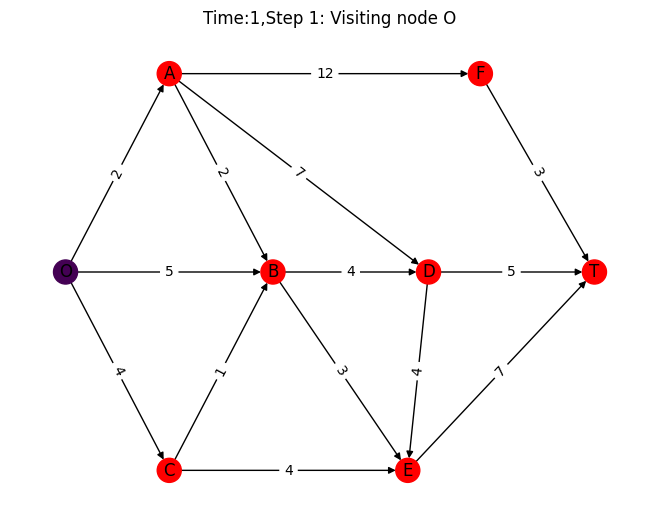

Time,1  Step 1 :
Visited node: O
Visited nodes so far: ['O']
Current shortest distances: {'O': 0, 'A': inf, 'B': inf, 'C': inf, 'D': inf, 'F': inf, 'E': inf, 'T': inf}




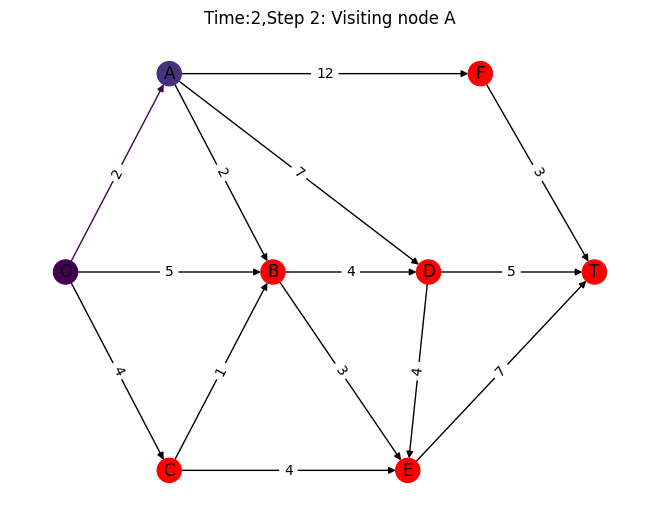

Time,2  Step 2 :
Visited node: A
Visited nodes so far: ['O', 'A']
Current shortest distances: {'O': 0, 'A': 2, 'B': 5, 'C': 4, 'D': inf, 'F': inf, 'E': inf, 'T': inf}




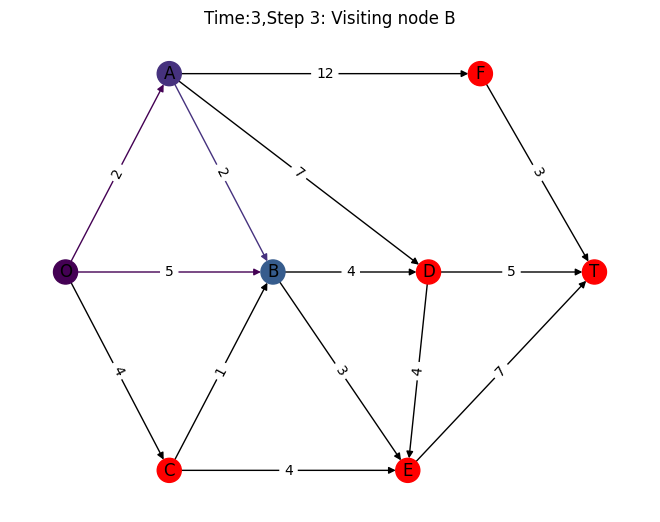

Time,3  Step 3 :
Visited node: B
Visited nodes so far: ['O', 'A', 'B']
Current shortest distances: {'O': 0, 'A': 2, 'B': 4, 'C': 4, 'D': 9, 'F': 14, 'E': inf, 'T': inf}




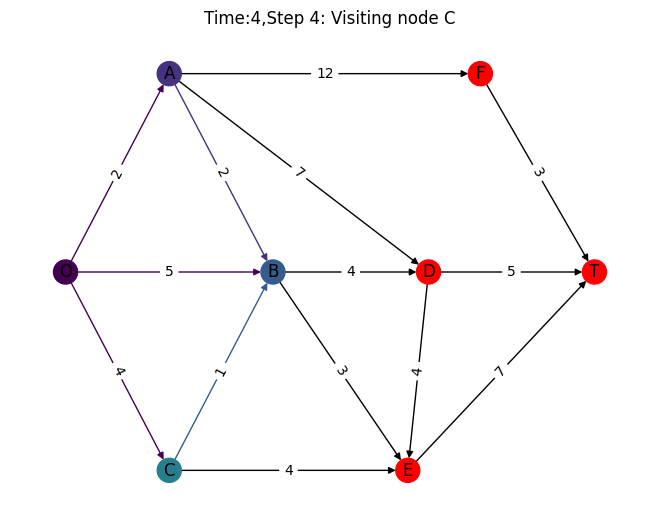

Time,4  Step 4 :
Visited node: C
Visited nodes so far: ['O', 'A', 'B', 'C']
Current shortest distances: {'O': 0, 'A': 2, 'B': 4, 'C': 4, 'D': 8, 'F': 14, 'E': 7, 'T': inf}




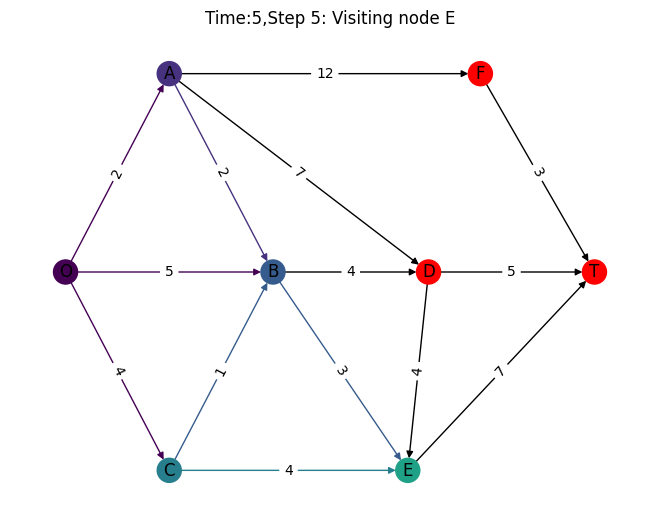

Time,5  Step 5 :
Visited node: E
Visited nodes so far: ['O', 'A', 'B', 'C', 'E']
Current shortest distances: {'O': 0, 'A': 2, 'B': 4, 'C': 4, 'D': 8, 'F': 14, 'E': 7, 'T': inf}




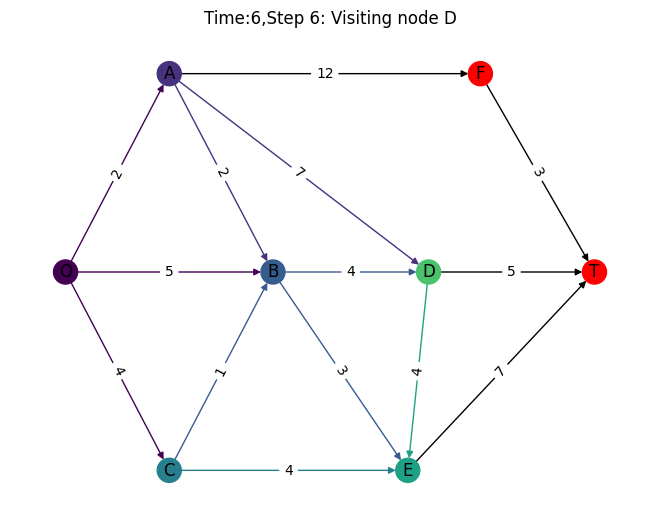

Time,6  Step 6 :
Visited node: D
Visited nodes so far: ['O', 'A', 'B', 'C', 'E', 'D']
Current shortest distances: {'O': 0, 'A': 2, 'B': 4, 'C': 4, 'D': 8, 'F': 14, 'E': 7, 'T': 14}




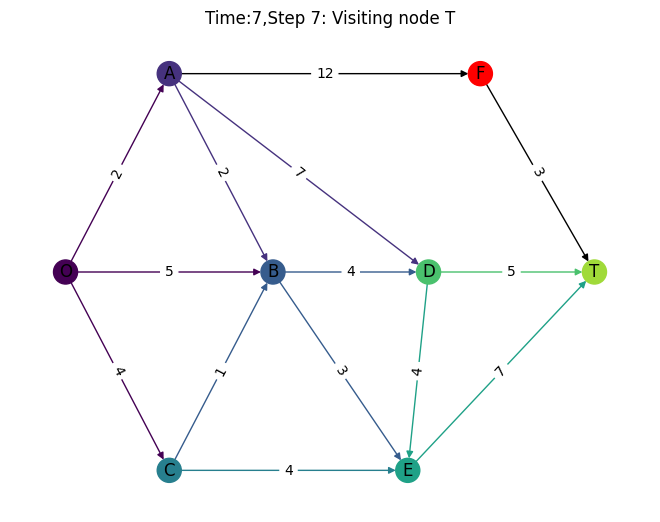

Time,7  Step 7 :
Visited node: T
Visited nodes so far: ['O', 'A', 'B', 'C', 'E', 'D', 'T']
Current shortest distances: {'O': 0, 'A': 2, 'B': 4, 'C': 4, 'D': 8, 'F': 14, 'E': 7, 'T': 13}




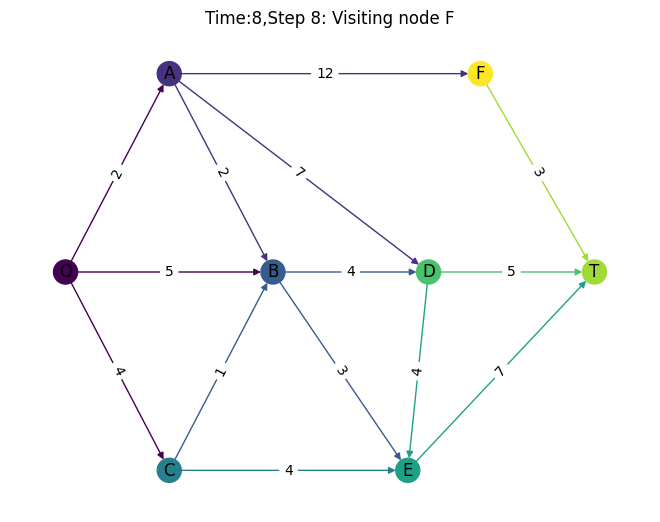

Time,8  Step 8 :
Visited node: F
Visited nodes so far: ['O', 'A', 'B', 'C', 'E', 'D', 'T', 'F']
Current shortest distances: {'O': 0, 'A': 2, 'B': 4, 'C': 4, 'D': 8, 'F': 14, 'E': 7, 'T': 13}




C:\Users\parsa\AppData\Local\Temp\ipykernel_36720\2625524832.py:128: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', len(G.nodes()))


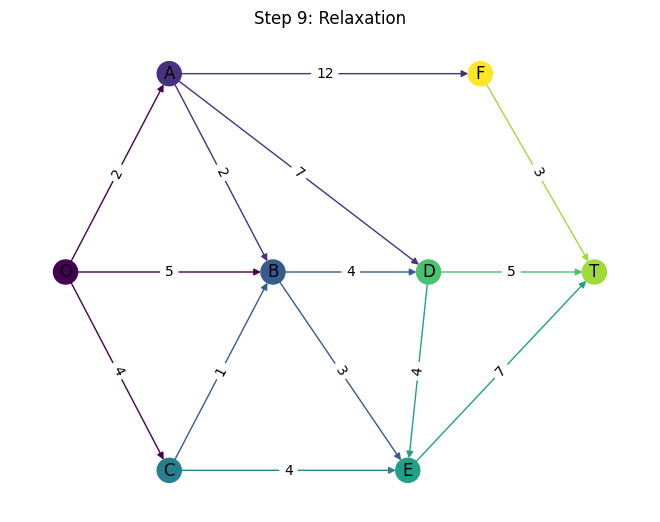

Time:9 Step 9: Relaxation of the last node T
Visited nodes: ['O', 'A', 'B', 'C', 'E', 'D', 'T', 'F']
Explain relaxation: T compares this node with its neighbors and updates their distances if necessary
prove relaxation: 13 < 14 + 3 = 17 then 17 > 13
Current shortest distances: {'O': 0, 'A': 2, 'B': 4, 'C': 4, 'D': 8, 'F': 14, 'E': 7, 'T': 13}


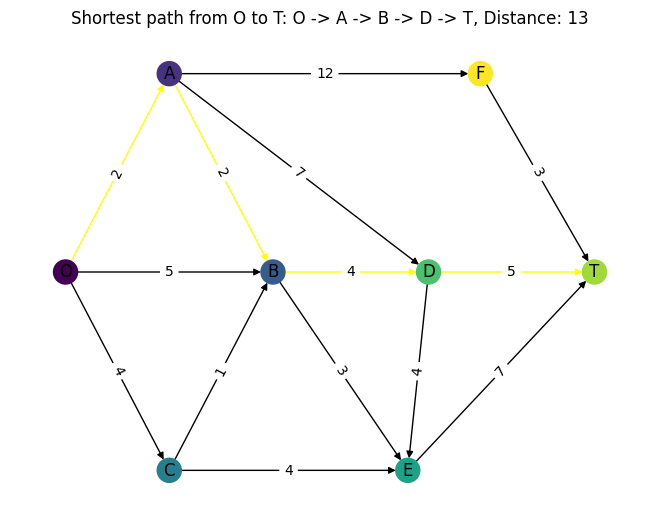

Time:9 Shortest path from O to T: ['O', 'A', 'B', 'D', 'T']
Shortest path from O to T: ['O', 'A', 'B', 'D', 'T']
Distance: 13


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Define the graph
graph = {
    'O': {'A': 2, 'B': 5, 'C': 4},
    'A': {'B': 2, 'D': 7, 'F': 12},
    'B': {'D': 4, 'E': 3},
    'C': {'B': 1, 'E': 4},
    'D': {'E': 4, 'T': 5},
    'E': {'T': 7},
    'F': {'T': 3},
    'T': {}
}


# Turn the graph into a NetworkX graph, adding the weights

G = nx.DiGraph()
for node, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)
pos = {'O': (0, 0), 'A': (1, .7), 'B': (2, 0), 'C': (1, -0.7), 'D': (3.5, 0), 'E': (3.3, -0.7), 'F': (4., .7), 'T': (5.1, 0)}
initial_node = 'O'
target_node = 'T'
INF = float('inf')

# Initialization
distances = {node: INF for node in G.nodes}
distances[initial_node] = 0
previous_nodes = {node: None for node in G.nodes}
visited_order = []
heap = [(0, initial_node)]
step = 1
new_weightinsert = [] # to store the new weight of the inserted edge
steps = []  # to store the state of each step
deleted_edges = []  # to store the deleted edges
inserted_edges = []  # to store the inserted edges
while heap:
    # Get the node with the smallest distance
    current_distance, current_node = heapq.heappop(heap)

    # Continue if the node has already been visited
    if current_node in visited_order:
        continue
    visited_order.append(current_node)

    # Store the state of the current step
    steps.append((distances.copy(), previous_nodes.copy(), visited_order.copy(), heap.copy())) # copy() is used to avoid storing references to the same objects

    # Ask the user if they want to continue or update/delete an edge
    
    action = input(f'Step {step}: Visited node {current_node}.continue?, update an edge,delet an edge,undo a deletion, or go back to a previous step? (Insert/delete/undo/Step) ')
    if action == 'up':
        # Ask the user for the edge and the new weight
        edge = input('Enter the edge to update (format: node1,node2): ')
        new_weight = int(input('Enter the new weight: '))
        node1, node2 = edge.split(',')
        G[node1][node2]['weight'] = new_weight
        print(f'Updated the weight of edge ({node1}, {node2}) to {new_weight}.')
    elif action == 'del':
        # Ask the user for the edge to delete
        edge = input('Enter the edge to delete (format: node1,node2): ')
        node1, node2 = edge.split(',')
        deleted_edges.append((node1, node2, G[node1][node2]['weight']))  # store the deleted edge and its weight
        G.remove_edge(node1, node2)
        print(f'Deleted the edge ({node1}, {node2}).')
    elif action == 'un':
        # Undo the last deletion
        if deleted_edges:
            node1, node2, weight = deleted_edges.pop()
            G.add_edge(node1, node2, weight=weight)
            print(f'Undid the deletion of edge ({node1}, {node2}).')
        else:
            print('No edge to undo.')
    elif action == 'ins':
        # Ask the user for the edge to insert and its weight
        edge = input('Enter the edge to insert (format: node1,node2): ')
        new_weightinsert = int(input('Enter the new weight: '))
        node1, node2 = edge.split(',')
        inserted_edges.append((node1, node2, G[node1][node2]['weight']))  # store the deleted edge and its weight
        G.add_edge(node1, node2, weight=new_weightinsert)
        print(f'Inserted the edge ({node1}, {node2}) with weight {new_weightinsert}.')    
    elif action == 't':
        # Ask the user for the step to go back to
        back_step = int(input('Enter the step to go back to: '))
        if back_step < step:
            distances, previous_nodes, visited_order, heap = steps[back_step]
            step = back_step
            print(f'Went back to step {back_step}.')
        else :
            print('Invalid Step.')
        continue 
        
   

    
    # Visualization: draw the graph with visited nodes and edges in different colors
    cmap = plt.cm.get_cmap('viridis', len(G.nodes()))  # use a color map that changes color gradually
    node_colors = [cmap(visited_order.index(node)) if node in visited_order else 'red' for node in G.nodes()]
    visited_edges = [(u, v) for u, v in G.edges if u in visited_order and v in visited_order]
    edge_colors = [cmap(min(visited_order.index(u), visited_order.index(v))) if (u, v) in visited_edges else 'black' for u, v in G.edges]
    
    #pos = nx.spring_layout(G, seed=42)  # use a fixed seed to get the same layout in each step
    nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title(f"Time:{step},Step {step}: Visiting node {current_node}")
    plt.show()

    print(f'Time,{step}  Step {step} :')
    print(f'Visited node: {current_node}')
    print(f'Visited nodes so far: {visited_order}')
    print(f'Current shortest distances: {distances}')
    print('\n') 
           
    # Update the distances to the neighboring nodes
    for neighbor, data in G[current_node].items(): # G[current_node] is a dictionary of neighbors and their attributes 
        weight = data['weight']
        distance = distances[current_node] + weight
        if distance < distances[neighbor]:
            distances[neighbor] = distance
            previous_nodes[neighbor] = current_node
            heapq.heappush(heap, (distance, neighbor))
    step += 1
# visualization: last step for relaxation
cmap = plt.cm.get_cmap('viridis', len(G.nodes()))
node_colors = [cmap(visited_order.index(node)) if node in visited_order else 'red' for node in G.nodes()]
visited_edges = [(u, v) for u, v in G.edges if u in visited_order and v in visited_order]
edge_colors = [cmap(min(visited_order.index(u), visited_order.index(v))) if (u, v) in visited_edges else 'black' for u, v in G.edges]
#pos = nx.spring_layout(G, seed=42)  # use a fixed seed to get the same layout in each step
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title(f"Step {step}: Relaxation")
plt.show()
print(f'Time:{step} Step {step}: Relaxation of the last node {current_node}')
print(f'Visited nodes: {visited_order}')
# print(f'Explain relaxation: {current_node} compares this node with its neighbors and updates their distances if necessary')
# for neighbor, data in G[current_node].items():
#     weight = data['weight']
#     distance = distances[current_node] + weight
# Relaxtion {distances[neighbor]} + {weight} its not true because ditances last node visted was 2+12=14 but the distance of node F and but From O to T is 13

print(f'Explain relaxation: {current_node} compares this node with its neighbors and updates their distances if necessary') 
rel=distance-weight
print(f'prove relaxation: {distances[neighbor]} < {rel} + {weight} = {distance} then {distance} > {distances[neighbor]}')
print(f'Current shortest distances: {distances}')
# Once all nodes are visited, print the shortest path
shortest_path = []
current_node = target_node
while current_node is not None:
    shortest_path.append(current_node)
    current_node = previous_nodes[current_node]
shortest_path = shortest_path[::-1]  # reverse the list to get the path
# Highlight shortest path in yellow
edge_colors = ['yellow' if (u, v) in zip(shortest_path, shortest_path[1:]) or (v, u) in zip(shortest_path, shortest_path[1:]) else 'black' for u, v in G.edges] 
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title(f"Shortest path from {initial_node} to {target_node}: {' -> '.join(shortest_path)}, Distance: {distances[target_node]}")
plt.show()
#distance[target_node] if updated one of edge is not true
#please help me to fix it and print vale of .join(shortest_path)
#how can print value of .join(shortest_path)
#How can I calculate the sum and size of the values in the array shortest_path list?

print(f'Time:{step} Shortest path from {initial_node} to {target_node}: {shortest_path}')
print(f'Shortest path from {initial_node} to {target_node}: {shortest_path}')
print(f'Distance: {distances[target_node]}') #pyhton -m pip install matplotlib